<h1>Importing the required libraries</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


<h1>Loading the data</h1>

In [2]:

data_file_path = "credit_risk_dataset.csv"

myData = pd.read_csv(data_file_path)


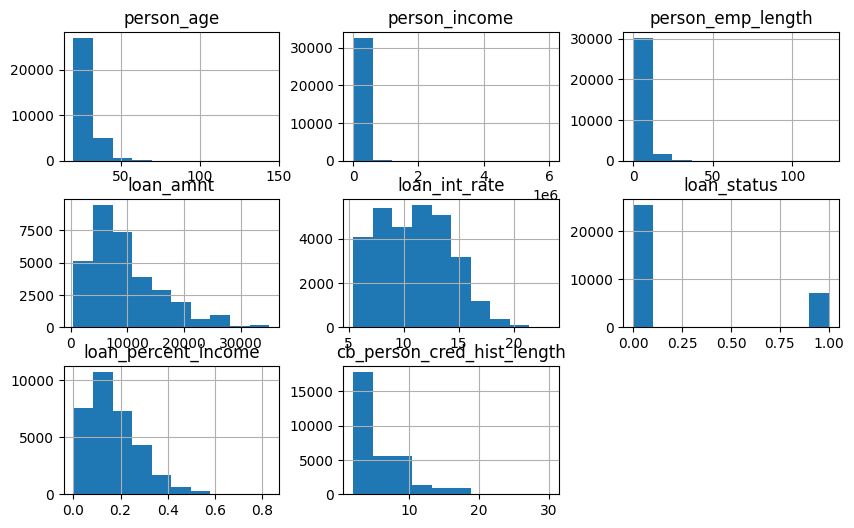

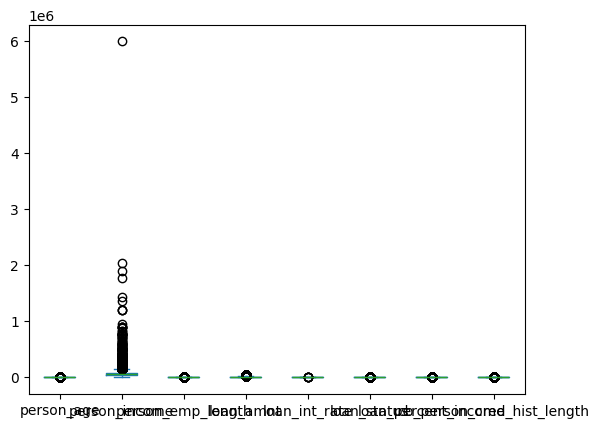

In [4]:
myData.hist(figsize=(10, 6))  # Create histograms for all columns
plt.show()

myData.plot(kind='box')  # Create box plots for all columns
plt.show()


<h1>Describing the data</h1>

In [3]:

myData.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<h1>Listing Top 5 Datas</h1>

In [4]:
myData.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<h1>Column names of the data</h1>

In [5]:
myData.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<h1>Shape of the data</h1>

In [6]:
myData.shape

(32581, 12)

<h1>Null values</h1>


<h3>Column-wise</h3>

In [7]:
myData.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<h2>Total null values</h2>

In [8]:
myData.isnull().sum().sum()

4011

<h1>Listing the type of each column</h1>

In [9]:
myData.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

<h1>Correlation Table w.r.t. columns with null values</h1>

In [10]:
numericalData = myData[['person_age', 'person_income', 'loan_amnt', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_emp_length', 'loan_int_rate']]
corrData = numericalData.corr()

#dropping the rows with missing values from the square matrix
corrData = corrData.drop(['person_emp_length', 'loan_int_rate'], axis=1)

#Keeping only the columns with no missing values
corrData_2 = corrData[-2:]*corrData[-2:]
corrData_2 = corrData_2.T
corrData_2

,person_emp_length,loan_int_rate
person_age,0.026603,1.582543e-04
person_income,0.018028,6.269055e-07
loan_amnt,0.012788,2.155416e-02
loan_status,0.006804,1.123139e-01
loan_percent_income,0.002928,1.447543e-02
cb_person_cred_hist_length,0.020938,2.787620e-04


<h1>Plotting the data with respect to the columns that have missing values</h1>

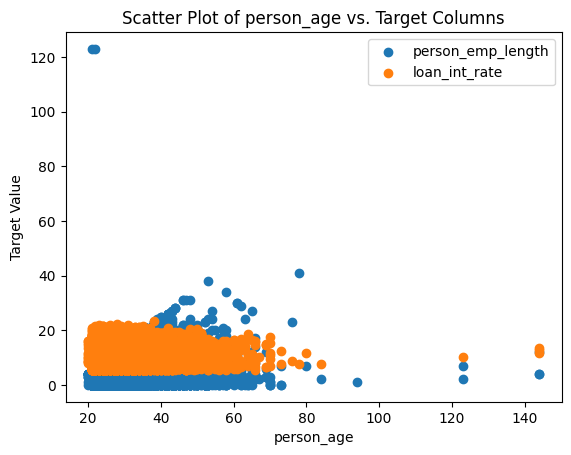

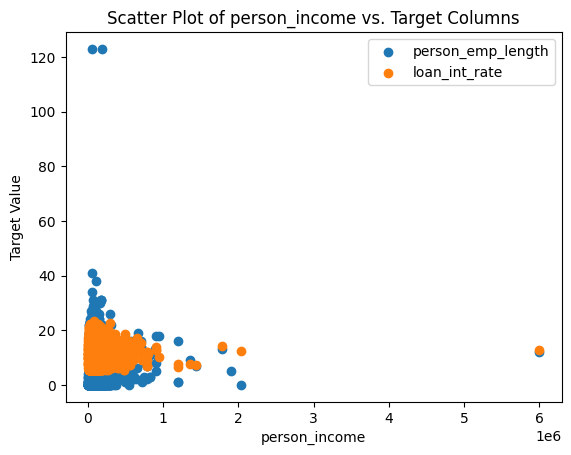

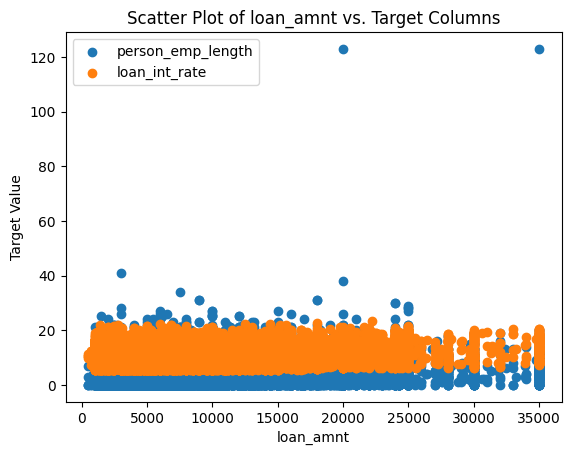

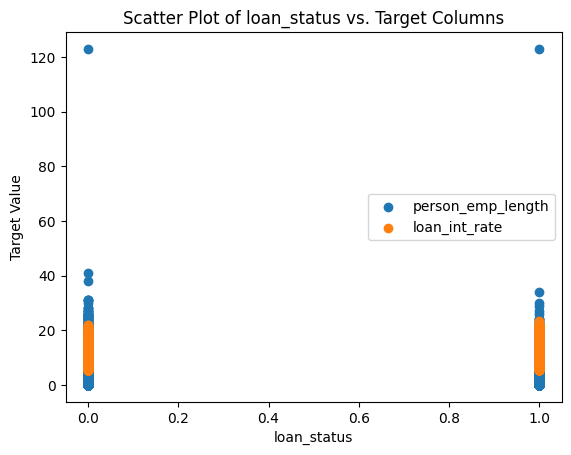

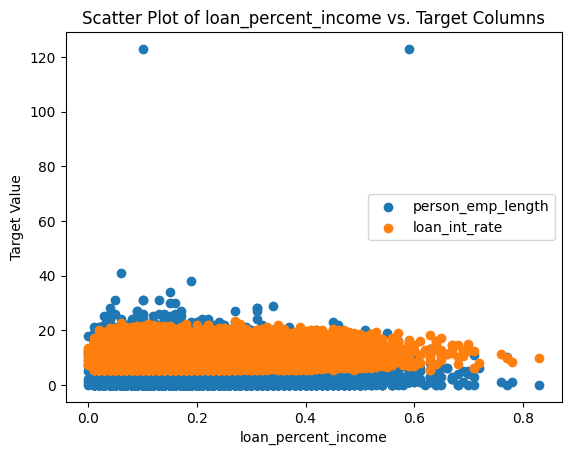

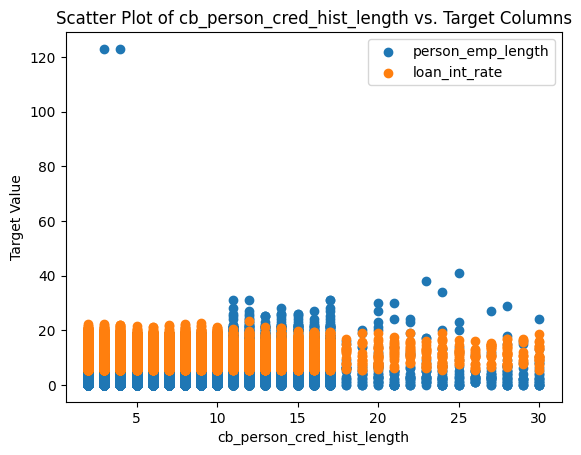

In [11]:
# Define the target columns
target_cols = ['person_emp_length', 'loan_int_rate']

# Iterate through each column (excluding target columns)
for col in numericalData.columns[:-2]:
  # Filter for non-NaN values
  filtered_df = numericalData[[col] + target_cols].dropna(subset=[col])

  # Create the scatter plot
  plt.figure()
  plt.scatter(filtered_df[col], filtered_df['person_emp_length'], label='person_emp_length')
  plt.scatter(filtered_df[col], filtered_df['loan_int_rate'], label='loan_int_rate')
  plt.xlabel(col)
  plt.ylabel('Target Value')
  plt.title(f'Scatter Plot of {col} vs. Target Columns')
  plt.legend()
  plt.show()

